# Matérn kernel on Hyperbolic 

This notebooks illustrates Matérn kernel on a Hyperbolic space.

We use numpy for the computations and matplotlib for vizualization.

In [1]:
# !pip install backends==1.4.32 plum-dispatch==1.7.4  # temporary measure

In [2]:
import geomstats.visualization as visualization
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

INFO: Using numpy backend


We employ the kernel defined by the _random phase features_. The mathematical details can be found in [1]. For the purposes of this notebook, it suffices to say that on noncompact symmetric spaces (of which the Hyperbolic space is a fine specimen), the kernel is defined in terms of an intractable integral, which we approximate via importance sampling. This is in contrast with _compact_ spaces (which we call `DiscreteSpectrumSpace`s) where the kernel is a sum of a _series_, approximatable via trunkation.

For the practical purposes, we just have to define a number of _random phases_ (the more the better the approximation is and the more computation is required), specify a feature map and pass it to the `MaternFeatureMapKernel`. The kernel requires a `key` to instantiate randomness in _random phases_, and is a **deterministic** function.

In [3]:
from geometric_kernels.kernels.geometric_kernels import MaternFeatureMapKernel
from geometric_kernels.kernels.feature_maps import random_phase_feature_map, random_phase_feature_map_rs
from geometric_kernels.spaces.hyperbolic import Hyperbolic

## Instantiate space and kernel



In the numpy world, the `key` is the `np.random.RandomState`:

In [4]:
_num_random_phases = 3_000  # This is the default value, we just state it for completeness

In [5]:
key = np.random.RandomState(seed=1234)  #

In [6]:
hyperboloid = Hyperbolic(dim=2)
feature_map_va = random_phase_feature_map(hyperboloid, num_random_phases=_num_random_phases)
feature_map_rs = random_phase_feature_map_rs(hyperboloid, num_random_phases=_num_random_phases)
kernel_va = MaternFeatureMapKernel(hyperboloid, feature_map_va, key)
kernel_rs = MaternFeatureMapKernel(hyperboloid, feature_map_rs, key)

NU = np.inf
LENGTHSCALE = 1.0

params_va, state_va = kernel_va.init_params_and_state()
params_va["nu"] = NU
params_va["lengthscale"] = LENGTHSCALE
params_rs, state_rs = kernel_rs.init_params_and_state()
params_rs["nu"] = NU
params_rs["lengthscale"] = LENGTHSCALE

## Test two kernels give similar results

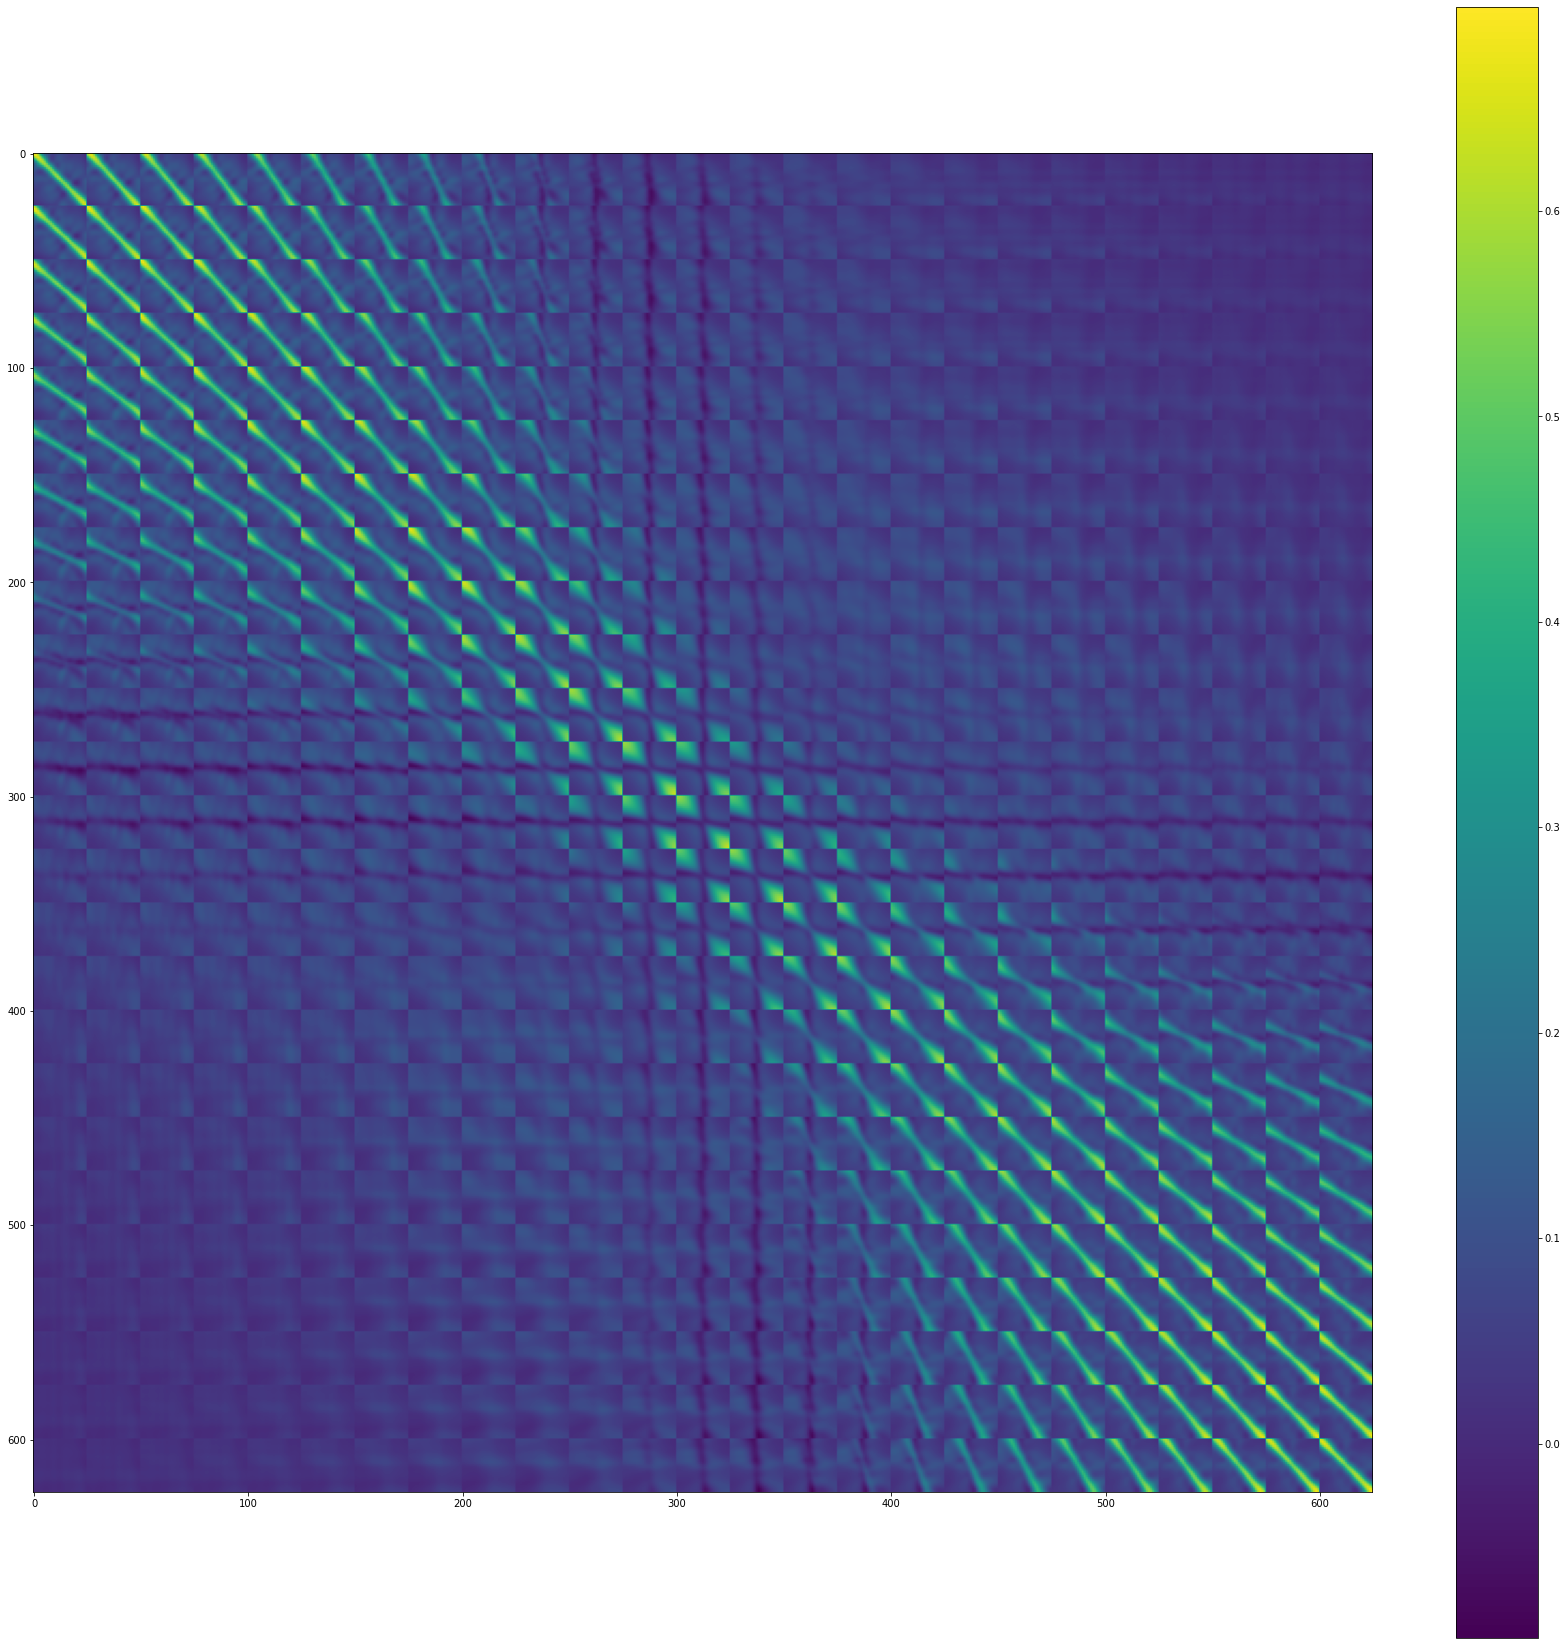

In [7]:
s = np.linspace(-5, 5, 25)
xx, yy = np.meshgrid(s, s)
points = np.c_[xx.ravel(), yy.ravel()]
points = hyperboloid.from_coordinates(points, "intrinsic")

kernel_matrix_va = kernel_va.K(params_va, state_va, points, points)
kernel_matrix_rs = kernel_rs.K(params_rs, state_rs, points, points)

plt.figure(figsize=(30, 30))
im = plt.imshow(kernel_matrix_va - kernel_matrix_rs)
plt.colorbar(im)

## Plot kernel values on a "grid"

We construct a quasi-grid in the Hyperbolic space. Since `Hyperbolic` inherits from `geomstats` [Hyperbolic](https://geomstats.github.io/geometry.html#module-geomstats.geometry.hyperbolic), we exploit this:

In [8]:
s = np.linspace(-5, 5, 100)
xx, yy = np.meshgrid(s, s)
points = np.c_[xx.ravel(), yy.ravel()]
points = hyperboloid.from_coordinates(points, "intrinsic")

In [9]:
base_point = hyperboloid.from_coordinates(np.r_[0, 0], "intrinsic").reshape(1, 3)

Again, we use `geomstats` vizualization module to plot data on a Hyperbolic disk.

In [10]:
kernel_vals_va = kernel_va.K(params_va, state_va, base_point, points)

-0.01287142821666506 0.9970996846891371


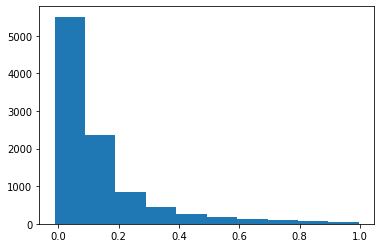

In [11]:
plt.hist(kernel_vals_va.flatten())
print(min(kernel_vals_va.flatten()), max(kernel_vals_va.flatten()))

0.9999999999999996 1.0000000000000004


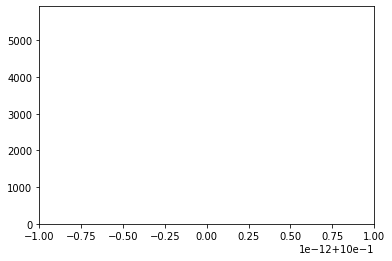

In [12]:
vars_va = kernel_va.K_diag(params_va, state_va, points)
plt.hist(vars_va.flatten())
print(min(vars_va.flatten()), max(vars_va.flatten()))

Text(0.5, 1.0, 'Importance sampling based kernel')

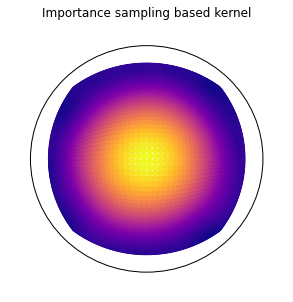

In [13]:
plt.figure(figsize=(5,5))
visualization.plot(points, space="H2_poincare_disk", c=kernel_vals_va, cmap="plasma")
plt.title("Importance sampling based kernel")

Text(0.5, 1.0, 'Importance sampling based variances')

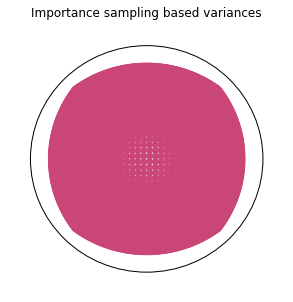

In [14]:
plt.figure(figsize=(5,5))
visualization.plot(points, space="H2_poincare_disk", c=vars_va, cmap="plasma", norm=matplotlib.colors.Normalize(vmin=0, vmax=2))
plt.title("Importance sampling based variances")

In [15]:
kernel_vals_rs = kernel_rs.K(params_rs, state_rs, base_point, points)

0.013550733855013958 0.9971113755204895


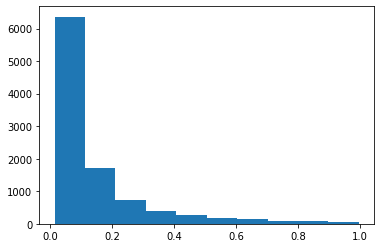

In [16]:
plt.hist(kernel_vals_rs.flatten())
print(min(kernel_vals_rs.flatten()), max(kernel_vals_rs.flatten()))

0.9999999999999996 1.0000000000000004


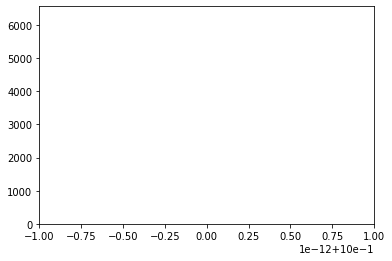

In [17]:
vars_rs = kernel_rs.K_diag(params_rs, state_rs, points)
plt.hist(vars_rs.flatten())
print(min(vars_rs.flatten()), max(vars_rs.flatten()))
# print(vars_rs)

Text(0.5, 1.0, 'Rejection sampling based kernel')

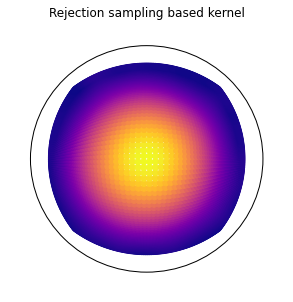

In [18]:
plt.figure(figsize=(5,5))
visualization.plot(points, space="H2_poincare_disk", c=kernel_vals_rs, cmap="plasma")
plt.title("Rejection sampling based kernel")

Text(0.5, 1.0, 'Rejection sampling based vars')

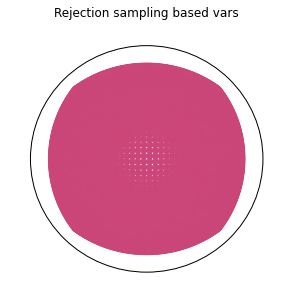

In [19]:
plt.figure(figsize=(5,5))
visualization.plot(points, space="H2_poincare_disk", c=vars_rs, cmap="plasma", norm=matplotlib.colors.Normalize(vmin=0, vmax=2))
plt.title("Rejection sampling based vars")

In [20]:
print(np.linalg.norm(kernel_vals_va.flatten()-kernel_vals_rs.flatten())/len(kernel_vals_va.flatten()))

0.00015141498080295898


We can also visualize as a hyperboloid. We transpose some coordinates to get a better view:

Text(0.5, 0.92, 'Importance sampling based kernel')

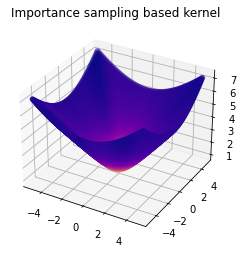

In [21]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
colors = kernel_vals_va[0]
ax.scatter(points[:, 2], points[:, 1], points[:, 0], c=colors, cmap='plasma')
plt.title("Importance sampling based kernel")

Text(0.5, 0.92, 'Rejection sampling based kernel')

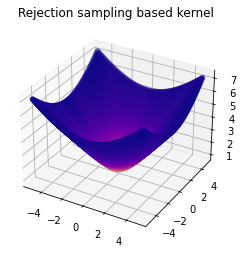

In [22]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
colors = kernel_vals_rs[0]
ax.scatter(points[:, 2], points[:, 1], points[:, 0], c=colors, cmap='plasma')
plt.title("Rejection sampling based kernel")

## Plot kernels' values along a geodesic

Let's plot kernel values `K(x, y)` where `y` runs the geodesic between `base` and `end_point`.

In [23]:
base = np.r_[7.14142843, -5.0, -5.0]
end_point = np.r_[14.17744688, 10.0, 10.0]

geodesic = hyperboloid.metric.geodesic(initial_point=base, end_point=end_point)
x1 = geodesic(np.linspace(0.0, 1.0, 30))
x2 = x1[0, None]

distances = hyperboloid.distance(x1, x2)

In [24]:
kernel_vals_va = kernel_va.K(params_va, state_va, x1, x2)
kernel_vals_rs = kernel_rs.K(params_rs, state_rs, x1, x2)

In [25]:
print(kernel_vals_va)

[[ 1.00000000e+00]
 [ 9.75554855e-01]
 [ 9.07178876e-01]
 [ 8.05094247e-01]
 [ 6.81719658e-01]
 [ 5.50001463e-01]
 [ 4.21962304e-01]
 [ 3.07364640e-01]
 [ 2.12581939e-01]
 [ 1.40026730e-01]
 [ 8.84570087e-02]
 [ 5.41229174e-02]
 [ 3.23142017e-02]
 [ 1.87211868e-02]
 [ 1.01894616e-02]
 [ 4.79262341e-03]
 [ 1.46124081e-03]
 [-4.73575916e-04]
 [-1.56038108e-03]
 [-2.27120206e-03]
 [-2.90980677e-03]
 [-3.52635549e-03]
 [-3.92945863e-03]
 [-3.81566347e-03]
 [-2.96978641e-03]
 [-1.43327368e-03]
 [ 4.65113417e-04]
 [ 2.24401183e-03]
 [ 3.48905698e-03]
 [ 4.02719080e-03]]


In [26]:
print(kernel_vals_rs)

[[ 0.31686898]
 [ 0.33950632]
 [ 0.35202861]
 [ 0.35365594]
 [ 0.34444079]
 [ 0.32507893]
 [ 0.29675128]
 [ 0.26105659]
 [ 0.2199762 ]
 [ 0.17578845]
 [ 0.13090721]
 [ 0.08768653]
 [ 0.04825681]
 [ 0.01441457]
 [-0.0124779 ]
 [-0.03163366]
 [-0.04299294]
 [-0.04727238]
 [-0.04581963]
 [-0.0403058 ]
 [-0.03240117]
 [-0.02357064]
 [-0.01500811]
 [-0.00762562]
 [-0.00202053]
 [ 0.0015743 ]
 [ 0.0032965 ]
 [ 0.0035742 ]
 [ 0.00297863]
 [ 0.002069  ]]


Text(0, 0.5, 'K')

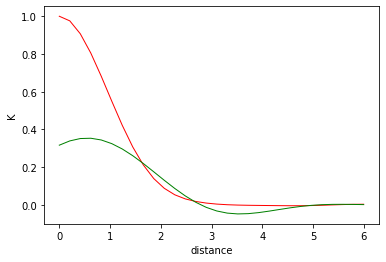

In [27]:
plt.plot(distances, kernel_vals_va, color="red", linewidth=1)
plt.plot(distances, kernel_vals_rs, color="green", linewidth=1)
plt.xlabel('distance')
plt.ylabel('K')

## Plot kernel values along a different geodesic

Let's plot kernel values `K(x, y)` where `y` runs the geodesic between `base` and `end_point`.

In [28]:
base = hyperboloid.from_coordinates(np.r_[0, 0], "intrinsic").reshape(1, 3)
end_point = np.r_[14.17744688, -10.0, -10.0]

geodesic = hyperboloid.metric.geodesic(initial_point=base, end_point=end_point)
x1 = geodesic(np.linspace(0.0, 1.0, 30))
x2 = x1[0, None]

distances = hyperboloid.distance(x1, x2)

In [29]:
kernel_rs.K(params_va, state_va, base, base)

array([[1.]])

In [30]:
kernel_vals_va = kernel_va.K(params_va, state_va, x1, x2)
kernel_vals_rs = kernel_rs.K(params_rs, state_rs, x1, x2)

In [31]:
print(kernel_vals_va)

[[ 1.        ]
 [ 0.99244866]
 [ 0.97014625]
 [ 0.93410316]
 [ 0.88590786]
 [ 0.82761121]
 [ 0.76158068]
 [ 0.69033834]
 [ 0.61639876]
 [ 0.54212292]
 [ 0.46960207]
 [ 0.40057994]
 [ 0.33641488]
 [ 0.27807695]
 [ 0.22617077]
 [ 0.18097422]
 [ 0.14248363]
 [ 0.11045925]
 [ 0.08446676]
 [ 0.06391418]
 [ 0.04808555]
 [ 0.03617535]
 [ 0.02732798]
 [ 0.02068522]
 [ 0.01544159]
 [ 0.01090319]
 [ 0.00654245]
 [ 0.00203917]
 [-0.00270072]
 [-0.00755423]]


In [32]:
print(kernel_vals_rs)

[[1.        ]
 [0.99244461]
 [0.97013662]
 [0.93410854]
 [0.88597873]
 [0.82782724]
 [0.76204572]
 [0.691175  ]
 [0.61774385]
 [0.54412177]
 [0.47239694]
 [0.40428886]
 [0.34110075]
 [0.28371254]
 [0.23260973]
 [0.18793912]
 [0.14957972]
 [0.11721676]
 [0.09040877]
 [0.06864117]
 [0.05136406]
 [0.038016  ]
 [0.02803778]
 [0.02088166]
 [0.01602021]
 [0.01295733]
 [0.0112414 ]
 [0.01047835]
 [0.0103417 ]
 [0.01057674]]


Text(0, 0.5, 'K')

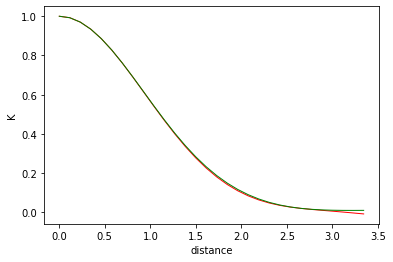

In [33]:
plt.plot(distances, kernel_vals_va, color="red", linewidth=1)
plt.plot(distances, kernel_vals_rs, color="green", linewidth=1)
plt.xlabel('distance')
plt.ylabel('K')